# Decision Tree

In [65]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [66]:
X, y = load_breast_cancer(return_X_y=True)

In [67]:
X.shape

(569, 30)

In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
dclf = DecisionTreeClassifier(random_state=0)
dclf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [71]:
y_hat = dclf.predict(x_test)
accuracy_score(y_test, y_hat)

0.8811188811188811

[Text(780.5357142857143, 718.76, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(498.2142857142857, 634.1999999999999, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(332.14285714285717, 549.64, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(199.28571428571428, 465.0799999999999, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(132.85714285714286, 380.52, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(66.42857142857143, 295.9599999999999, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(199.28571428571428, 295.9599999999999, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(132.85714285714286, 211.39999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(265.7142857142857, 211.39999999999998, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(199.28571428571428, 126.83999999999992, 'X[1] <= 22.385\ngini = 0.32\nsam

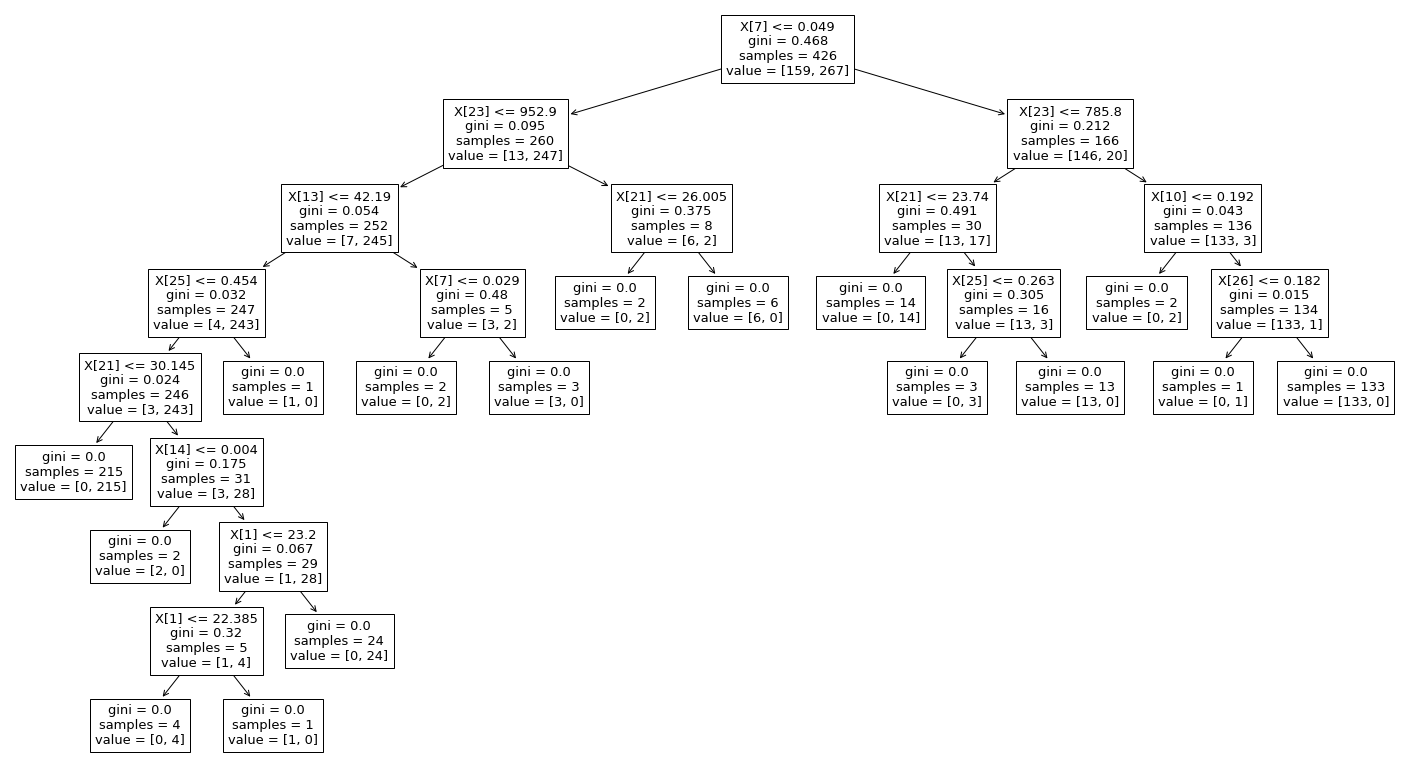

In [72]:
plt.figure(figsize=(25, 14))
plot_tree(dclf)

ccp : Cost and Complexity pruning

In [73]:
paths = dclf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = paths.ccp_alphas, paths.impurities

In [74]:
ccp = ccp_alphas[:-1]
ccp

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475])

In [75]:
clfs = []
for ccp_alpha in ccp:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.3272984419327777


In [76]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

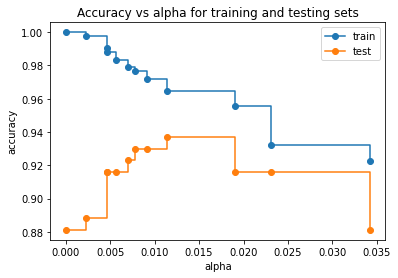

In [77]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()



For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.



In [80]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.012, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [81]:
y_hat = clf.predict(x_test)
accuracy_score(y_test, y_hat)

0.9370629370629371